# EDA

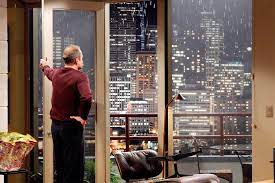

## Ask Phase

```
Client/Stakeholder: Amy Williams
Italian mafiosi, sells several central houses(top10%) over time, needs average outskirt houses over time to hide from the FBI

Purpose: 
Sell her houses which are in a range of the 10% most expensive.
With the money raised from the sale of the houses, buy several houses (of a midrange)in the suburbs. 

```


### Data Understanding/ Prepare Phase

```
Content:
This dataset contains house sales prices for King County, covering the homes sold between 2014 and 2015.

The dataset includes 1 csv file. Each house has an ID. After analysis, 21420 distinct IDs were identified. There are problems that could lead to biased results, such as the lack of information such as rankings based on crime, and local amenities. A ranking based on data from the U.S. Census, like FBI, BLS, and other sources would be helpful in this analysis considering our stakeholder. Also the fact that the sample is no longer up to date.
```

#### Column names:

```
id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms
sqft_living = Square footage of the apartments interior living space
sqft_lot =  Square footage of the land space
floors - Number of floors(levels in house)
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - Has been viewed
condition - How good the condition is (Overall).1 is the lowest and 5 is the highest.
grade =  Overall grade given to the housing unit, based on King County grading system. 1 is the lowest and 13 is the highest.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors
```

## Process Phase

In [3775]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff



from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3776]:
df = pd.read_csv("data/King_County_House_prices_dataset.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [3777]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,...,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.000,2,0.750,1020,1076,2.000,0.000,0.000,...,7,1020,0.0,2008,0.000,98144,47.594,-122.299,1020,1357


In [3778]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are 3 different data types columns:
- float64(8)
- int64(11)
- object(2)
The column "yr_built" and "yr_renovated" must be both converted in date type.


"bathrooms" column is float??? 
"sqft_basement " column is object?

In [3779]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

Somewhere in the column "sqft_basement" column is a "?"-character hidden. Out of curiosity let's try to find it.

In [3780]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [3781]:
df.query('sqft_basement == "?"')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
18,16000397,12/5/2014,189000.000,2,1.000,1200,9850,1.000,0.000,0.000,...,7,1200,?,1921,0.000,98002,47.309,-122.210,1060,5095
42,7203220400,7/7/2014,861990.000,5,2.750,3595,5639,2.000,0.000,0.000,...,9,3595,?,2014,0.000,98053,47.685,-122.016,3625,5639
79,1531000030,3/23/2015,720000.000,4,2.500,3450,39683,2.000,0.000,0.000,...,10,3450,?,2002,0.000,98010,47.342,-122.025,3350,39750
112,2525310310,9/16/2014,272500.000,3,1.750,1540,12600,1.000,0.000,0.000,...,7,1160,?,1980,0.000,98038,47.362,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.000,5,3.000,2360,5000,1.000,0.000,0.000,...,7,1390,?,2008,0.000,98103,47.693,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.000,4,2.500,2330,4907,2.000,0.000,0.000,...,7,2330,?,2013,NaN,98042,47.359,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.000,2,2.500,980,1010,3.000,NaN,0.000,...,8,980,?,2008,0.000,98117,47.684,-122.387,980,1023
21519,2909310100,10/15/2014,332000.000,4,2.500,2380,5737,2.000,0.000,0.000,...,7,2380,?,2010,0.000,98023,47.282,-122.356,2380,5396


There are 454 rows with string entries. Sine my stakeholder needs to buy houses with basements, I will delete these rows.

In [3782]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


````
mean price = $540296.574
mean bedrooms = 3.373
mean sqft_living = 2080.322
mean sqft_lot = 15099.409	
mean floors = 1.494
````


There is a big difference between 75% quartile and max value on the follow columns : Price, bedrooms,bathrooms,sqft_living,sqft_lot, sqft_above,sqft_living15 and sqft_lot15. I can assume that there are outliers.

In [3783]:
df.id.nunique()


21420

There are 21420 different Ids.

In [3784]:
df.zipcode.nunique()

70

In [3785]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

There are 70 different zip codes.

In [3786]:
df.year_built_sorted = df.yr_built.unique()
df.year_built_sorted.sort()
df.year_built_sorted

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

Houses built from 1900 until 2015.

In [3787]:
df.year_renovated_sorted = df.yr_renovated.unique()
df.year_renovated_sorted.sort()
df.year_renovated_sorted


array([   0., 1934., 1940., 1944., 1945., 1946., 1948., 1950., 1951.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1962.,
       1963., 1964., 1965., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015.,   nan])

Houses renovated between 1934 and 2015


Maybe could be helpful to establish a correlation between houses renovated or not and the price they were sold, to understand if interests Amy to renovate some of her houses to increase the yield

In [3788]:
df.bedrooms.unique()


array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

There are houses from 1 until 33 bedrooms. 33 is the outlier I noticed earlier. Let's have a look on this row


In [3789]:
df[df["bedrooms"]> 11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.000,33,1.750,1620,6000,1.000,0.000,0.000,...,7,1040,580.0,1947,0.000,98103,47.688,-122.331,1330,4700


I guess it is a Typo, because there is just one bathroom. A will delete this row.

In [3790]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [3791]:
df.condition.unique()

array([3, 5, 4, 1, 2])

I recommend homes with condition from 3, which do not require renovation. A construction can redirect attention, and that is not Amy needs right now.

## Dealing with duplicates

In [3792]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()

False    21597
dtype: int64

There are no duplicates in this dataset.


## Data Types and Transforming Data

Let's start do drop the line we already detected as an outlier, we believe is an error, since this house as 33 bedrooms and just one bathroom.

In [3793]:
df[df["bedrooms"]> 11].index

Int64Index([15856], dtype='int64')

In [3794]:
df = df.drop(df.index[15856])

Let's now check and convert the data type of the columns "date" "yr_built" and "yr_renovated".

In [3795]:
# type of first date entry for "date" column.
type(df["date"][0])

str

In [3796]:
# type of first date entry for "yr_built" column.
type(df["yr_built"][0])

numpy.int64

In [3797]:
# type of first date entry for "yr_renovated" column.
type(df["yr_renovated"][0])

numpy.float64

Let's now change the datatype of these three columns:

In [3798]:
# change "date" dtype to datetime with format %m/%d/%Y
df["date"] = pd.to_datetime(df["date"], format='%m/%d/%Y')

In [3799]:
# type of first date entry for "date" column.
type(df["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [3800]:
df["yr_built"] = pd.to_datetime(df["yr_built"], format='%Y')

In [3801]:
# type of first date entry for "date" column.
type(df["yr_built"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [3802]:
df["yr_renovated"] = pd.to_datetime(df["yr_renovated"], format='%Y')

ValueError: time data '0' does not match format '%Y' (match)

Is not possible to convert to datetime because of "0" values. Let's first check how many rows with this value we have:

In [3803]:
df[df["yr_renovated"]== 0.]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955-01-01,0.000,98178,47.511,-122.257,1340,5650
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965-01-01,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987-01-01,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001-01-01,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995-01-01,0.000,98003,47.310,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.0,2009-01-01,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.0,2014-01-01,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.0,2009-01-01,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,2015-01-16,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,...,8,1600,0.0,2004-01-01,0.000,98027,47.535,-122.069,1410,1287


Those are many rows, we can delete the nan values(assuming they represents houses we do not know about a renovation). And replace the "0" (we assume that represents houses who have not being renovated) in "nan". Let's first see how many nan value we have:

In [3804]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [3805]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [3806]:
# import missingno
import missingno as msno

<AxesSubplot:>

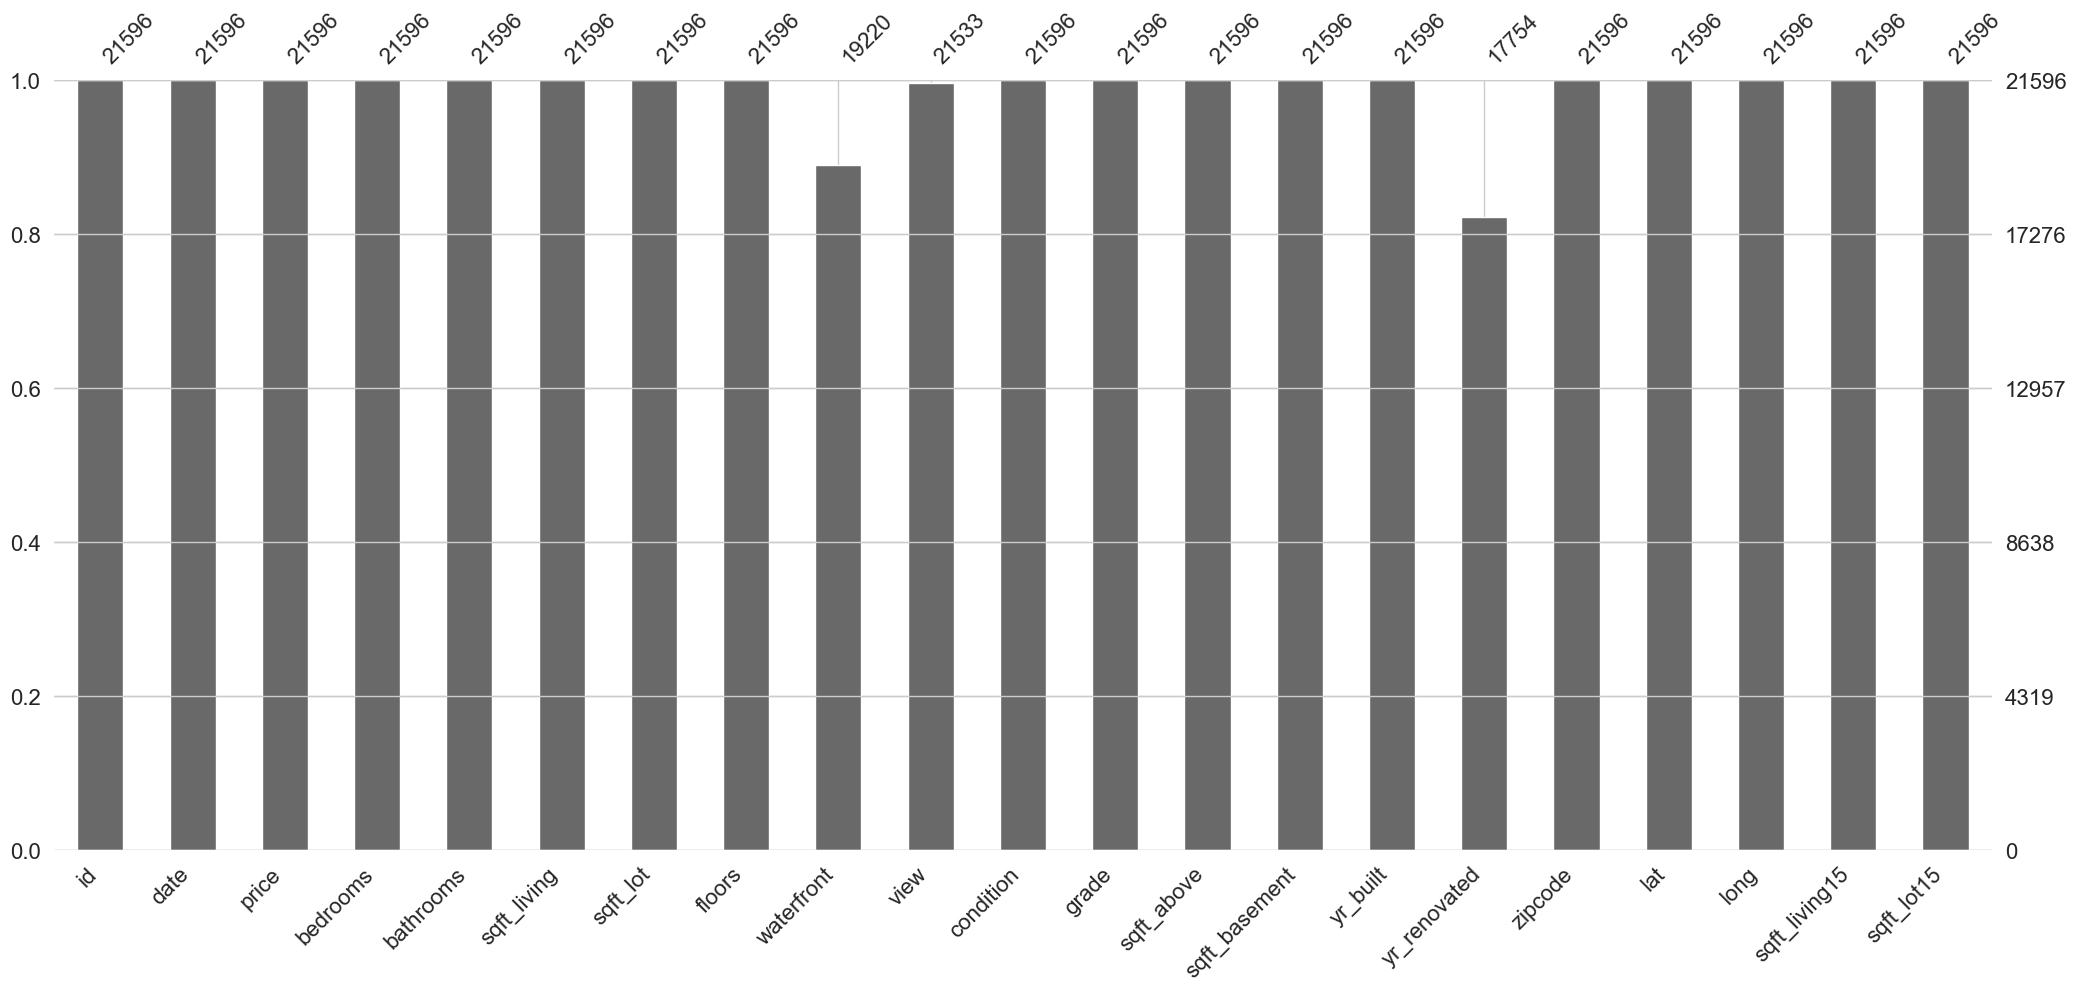

In [3807]:
# plotting percentage of missing values per column
msno.bar(df)

In this case we have only 3 columns with missing values and the amount doesn't seem too much. But let's put those numbers in context:

In [3808]:
print(f"numbers of rows : {df.shape[0]}")
print(f"missing values in waterfront : {round(df.waterfront.isna().sum()/df.shape[0]*100,2)} %")
print(f"missing values in view : {round(df.view.isna().sum()/df.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(df.yr_renovated.isna().sum()/df.shape[0]*100,2)} %")
print(f"missing values in data frame : {round(df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100,2)} %")


numbers of rows : 21596
missing values in waterfront : 11.0 %
missing values in view : 0.29 %
missing values in yr_renovated : 17.79 %
missing values in data frame : 1.38 %


Since I will not work with the "view" column, I will just drop it:

In [3809]:
df.drop("view",inplace=True, axis=1)

And now, let's drop the "nan" values:


In [3810]:
df.isna().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [3811]:
df.dropna(inplace=True)

In [3812]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15808 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15808 non-null  int64         
 1   date           15808 non-null  datetime64[ns]
 2   price          15808 non-null  float64       
 3   bedrooms       15808 non-null  int64         
 4   bathrooms      15808 non-null  float64       
 5   sqft_living    15808 non-null  int64         
 6   sqft_lot       15808 non-null  int64         
 7   floors         15808 non-null  float64       
 8   waterfront     15808 non-null  float64       
 9   condition      15808 non-null  int64         
 10  grade          15808 non-null  int64         
 11  sqft_above     15808 non-null  int64         
 12  sqft_basement  15808 non-null  object        
 13  yr_built       15808 non-null  datetime64[ns]
 14  yr_renovated   15808 non-null  float64       
 15  zipcode        1580

In [3814]:
df.yr_renovated.unique()

array([1991.,    0., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1990., 1988., 1977.,
       1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004., 1986.,
       2007., 1987., 2006., 1985., 2001., 1980., 1971., 1945., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 2008., 2012., 1968.,
       1963., 1951., 1962., 1953., 1993., 1955., 1996., 1982., 1956.,
       1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959., 1960.,
       1965., 1967., 1934., 1972., 1944., 1958., 1974.])

In [3815]:
df["yr_renovated"] = df["yr_renovated"].apply(np.int64)

In [3816]:
df['renovated'] = df['yr_renovated']

In [3817]:
df['renovated'] = df['renovated'].apply(str)

In [3818]:
df['renovated'] = df.renovated.replace('0','no')

In [3819]:
df.renovated.unique()

array(['1991', 'no', '2002', '2010', '1992', '2013', '1994', '1978',
       '2005', '2003', '1984', '1954', '2014', '2011', '1983', '1990',
       '1988', '1977', '1981', '1995', '2000', '1999', '1998', '1970',
       '1989', '2004', '1986', '2007', '1987', '2006', '1985', '2001',
       '1980', '1971', '1945', '1979', '1997', '1950', '1969', '1948',
       '2009', '2015', '2008', '2012', '1968', '1963', '1951', '1962',
       '1953', '1993', '1955', '1996', '1982', '1956', '1940', '1976',
       '1946', '1975', '1964', '1973', '1957', '1959', '1960', '1965',
       '1967', '1934', '1972', '1944', '1958', '1974'], dtype=object)

In [3820]:
df['renovated'] = df.renovated.replace(['1991','2002', '2010', '1992', '2013', '1994', '1978',
       '2005', '2003', '1984', '1954', '2014', '2011', '1983', '1990',
       '1988', '1977', '1981', '1995', '2000', '1999', '1998', '1970',
       '1989', '2004', '1986', '2007', '1987', '2006', '1985', '2001',
       '1980', '1971', '1945', '1979', '1997', '1950', '1969', '1948',
       '2009', '2015', '2008', '2012', '1968', '1963', '1951', '1962',
       '1953', '1993', '1955', '1996', '1982', '1956', '1940', '1976',
       '1946', '1975', '1964', '1973', '1957', '1959', '1960', '1965',
       '1967', '1934', '1972', '1944', '1958', '1974'],'yes')

In [3821]:
df.renovated.unique()

array(['yes', 'no'], dtype=object)

In [3822]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,3,...,2170,400.0,1951-01-01,1991,98125,47.721,-122.319,1690,7639,yes
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,5,...,1050,910.0,1965-01-01,0,98136,47.521,-122.393,1360,5000,no
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,3,...,1680,0.0,1987-01-01,0,98074,47.617,-122.045,1800,7503,no
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,3,...,3890,1530.0,2001-01-01,0,98053,47.656,-122.005,4760,101930,no
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,3,...,1715,?,1995-01-01,0,98003,47.310,-122.327,2238,6819,no


Let's also convert the column "price" in integer:

In [3823]:
df["price"] = df["price"].apply(np.int64)

In [3824]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15808 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15808 non-null  int64         
 1   date           15808 non-null  datetime64[ns]
 2   price          15808 non-null  int64         
 3   bedrooms       15808 non-null  int64         
 4   bathrooms      15808 non-null  float64       
 5   sqft_living    15808 non-null  int64         
 6   sqft_lot       15808 non-null  int64         
 7   floors         15808 non-null  float64       
 8   waterfront     15808 non-null  float64       
 9   condition      15808 non-null  int64         
 10  grade          15808 non-null  int64         
 11  sqft_above     15808 non-null  int64         
 12  sqft_basement  15808 non-null  object        
 13  yr_built       15808 non-null  datetime64[ns]
 14  yr_renovated   15808 non-null  int64         
 15  zipcode        1580

Above, we have noticed that the column"sqft_basement" has as datatype, object.  Somewhere in this column is a `?`-character hidden. Out of curiosity let's try to find it.

In [3825]:
df.sqft_basement.unique()

array(['400.0', '910.0', '0.0', '1530.0', '?', '730.0', '300.0', '970.0',
       '760.0', '720.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '588.0', '1510.0', '990.0', '600.0', '550.0', '1000.0',
       '1600.0', '1700.0', '500.0', '700.0', '1040.0', '1010.0', '240.0',
       '290.0', '800.0', '540.0', '560.0', '710.0', '840.0', '770.0',
       '570.0', '1490.0', '620.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '1310.0', '630.0', '2000.0', '390.0', '210.0', '1950.0', '440.0',
       '220.0', '1160.0', '580.0', '2060.0', '1820.0', '1180.0', '380.0',
       '1150.0', '1200.0', '680.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1250.0', '1100.0', '1400.0', '530.0', '490.0',
       '1220.0', '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.0',
       '270.0', '350.0', '935.0', '200.0', '850.0', '1470.0', '160.0',
       '950.0', '1370.0', '460.0', '50.0', '1900.0', 

In [3826]:
# display rows with "?" in precipitation column
df.query('sqft_basement == "?"')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
6,1321400060,2014-06-27,257500,3,2.250,1715,6819,2.000,0.000,3,...,1715,?,1995-01-01,0,98003,47.310,-122.327,2238,6819,no
18,16000397,2014-12-05,189000,2,1.000,1200,9850,1.000,0.000,4,...,1200,?,1921-01-01,0,98002,47.309,-122.210,1060,5095,no
42,7203220400,2014-07-07,861990,5,2.750,3595,5639,2.000,0.000,3,...,3595,?,2014-01-01,0,98053,47.685,-122.016,3625,5639,no
79,1531000030,2015-03-23,720000,4,2.500,3450,39683,2.000,0.000,3,...,3450,?,2002-01-01,0,98010,47.342,-122.025,3350,39750,no
112,2525310310,2014-09-16,272500,3,1.750,1540,12600,1.000,0.000,4,...,1160,?,1980-01-01,0,98038,47.362,-122.031,1540,11656,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21210,3278600680,2014-06-27,235000,1,1.500,1170,1456,2.000,0.000,3,...,1070,?,2007-01-01,0,98126,47.549,-122.372,1360,1730,no
21357,2309710150,2014-08-04,325000,4,3.250,2800,5291,2.000,0.000,3,...,2800,?,2011-01-01,0,98022,47.194,-121.977,2380,5291,no
21365,9521100301,2014-05-07,339950,2,1.000,820,681,3.000,0.000,3,...,820,?,2006-01-01,0,98103,47.662,-122.352,820,1156,no
21442,3226049565,2014-07-11,504600,5,3.000,2360,5000,1.000,0.000,3,...,1390,?,2008-01-01,0,98103,47.693,-122.330,2180,5009,no


There are 335 rows. Let's replace this "?" with a "nan", delete them and finally convert into an integer:

In [3827]:
#replace the `?`-character with a numpy NaN value
df['sqft_basement'] = df.sqft_basement.replace('?',np.NaN)
# change data type to float
#df = df.astype({'sqft_basement': })
#df.sqft_basement.dtypes

In [3828]:
df.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
condition          0
grade              0
sqft_above         0
sqft_basement    335
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
renovated          0
dtype: int64

In [3829]:
df.dropna(inplace=True)

In [3830]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

In [3831]:
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float)

In [3832]:
df.sqft_basement.dtypes

dtype('float64')

We still need to convert the sqft_basement into integer:


In [3833]:
df["sqft_basement"] = df["sqft_basement"].apply(np.int64)

In [3834]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
1,6414100192,2014-12-09,538000,3,2.250,2570,7242,2.000,0.000,3,...,2170,400,1951-01-01,1991,98125,47.721,-122.319,1690,7639,yes
3,2487200875,2014-12-09,604000,4,3.000,1960,5000,1.000,0.000,5,...,1050,910,1965-01-01,0,98136,47.521,-122.393,1360,5000,no
4,1954400510,2015-02-18,510000,3,2.000,1680,8080,1.000,0.000,3,...,1680,0,1987-01-01,0,98074,47.617,-122.045,1800,7503,no
5,7237550310,2014-05-12,1230000,4,4.500,5420,101930,1.000,0.000,3,...,3890,1530,2001-01-01,0,98053,47.656,-122.005,4760,101930,no
7,2008000270,2015-01-15,291850,3,1.500,1060,9711,1.000,0.000,3,...,1060,0,1963-01-01,0,98198,47.410,-122.315,1650,9711,no


In [3835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15473 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15473 non-null  int64         
 1   date           15473 non-null  datetime64[ns]
 2   price          15473 non-null  int64         
 3   bedrooms       15473 non-null  int64         
 4   bathrooms      15473 non-null  float64       
 5   sqft_living    15473 non-null  int64         
 6   sqft_lot       15473 non-null  int64         
 7   floors         15473 non-null  float64       
 8   waterfront     15473 non-null  float64       
 9   condition      15473 non-null  int64         
 10  grade          15473 non-null  int64         
 11  sqft_above     15473 non-null  int64         
 12  sqft_basement  15473 non-null  int64         
 13  yr_built       15473 non-null  datetime64[ns]
 14  yr_renovated   15473 non-null  int64         
 15  zipcode        1547

Let's focus now in the column "waterfront". 

In [3836]:
df.waterfront.unique()

array([0., 1.])

In [3837]:
df['waterfront'] = df['waterfront'].astype(str)

In [3838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15473 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15473 non-null  int64         
 1   date           15473 non-null  datetime64[ns]
 2   price          15473 non-null  int64         
 3   bedrooms       15473 non-null  int64         
 4   bathrooms      15473 non-null  float64       
 5   sqft_living    15473 non-null  int64         
 6   sqft_lot       15473 non-null  int64         
 7   floors         15473 non-null  float64       
 8   waterfront     15473 non-null  object        
 9   condition      15473 non-null  int64         
 10  grade          15473 non-null  int64         
 11  sqft_above     15473 non-null  int64         
 12  sqft_basement  15473 non-null  int64         
 13  yr_built       15473 non-null  datetime64[ns]
 14  yr_renovated   15473 non-null  int64         
 15  zipcode        1547

Let's replace the "0." - "no" and "1" - "yes"

In [3839]:
df['waterfront'] = df.waterfront.replace('0.0','no')

In [3840]:
df['waterfront'] = df.waterfront.replace('1.0','yes')

In [3841]:
df.waterfront.unique()

array(['no', 'yes'], dtype=object)

In [3842]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15473 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15473 non-null  int64         
 1   date           15473 non-null  datetime64[ns]
 2   price          15473 non-null  int64         
 3   bedrooms       15473 non-null  int64         
 4   bathrooms      15473 non-null  float64       
 5   sqft_living    15473 non-null  int64         
 6   sqft_lot       15473 non-null  int64         
 7   floors         15473 non-null  float64       
 8   waterfront     15473 non-null  object        
 9   condition      15473 non-null  int64         
 10  grade          15473 non-null  int64         
 11  sqft_above     15473 non-null  int64         
 12  sqft_basement  15473 non-null  int64         
 13  yr_built       15473 non-null  datetime64[ns]
 14  yr_renovated   15473 non-null  int64         
 15  zipcode        1547

In [3843]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000,15473.000
mean,4593082829.445,541754.020,3.377,2.122,2086.075,15305.253,1.494,3.411,7.664,1793.768,292.307,81.663,98077.472,47.559,-122.214,1991.181,12876.180
std,2874759103.991,374780.326,0.903,0.767,920.470,42063.539,0.539,0.651,1.174,829.285,444.044,395.428,53.460,0.139,0.140,684.829,27822.802
min,1000102.000,82000.000,1.000,0.500,370.000,520.000,1.000,1.000,3.000,370.000,0.000,0.000,98001.000,47.156,-122.519,399.000,659.000
25%,2125400160.000,320000.000,3.000,1.750,1430.000,5056.000,1.000,3.000,7.000,1200.000,0.000,0.000,98032.000,47.469,-122.328,1490.000,5101.000
50%,3905081520.000,450000.000,3.000,2.250,1920.000,7620.000,1.500,3.000,7.000,1570.000,0.000,0.000,98065.000,47.571,-122.229,1850.000,7626.000
75%,7334501240.000,643500.000,4.000,2.500,2550.000,10714.000,2.000,4.000,8.000,2220.000,560.000,0.000,98117.000,47.678,-122.124,2370.000,10108.000
max,9895000040.000,7700000.000,11.000,8.000,13540.000,1651359.000,3.500,5.000,13.000,9410.000,4820.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


The data is ready! I can finally start analyzing it!

## Analyse Phase

Let's focus first in " Sell her houses which are in a range of the 10% most expensive."

We need to sort the 10% of the most priced houses, which is our target.

In [3844]:
#10% of 15473 is 1547.3
df_sorted_sell = df.sort_values("price", ascending = False).head(1547)
df_sorted_sell

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
7245,6762700020,2014-10-13,7700000,6,8.000,12050,27600,2.500,no,4,...,8570,3480,1910-01-01,1987,98102,47.630,-122.323,3940,8800,yes
3910,9808700762,2014-06-11,7060000,5,4.500,10040,37325,2.000,yes,3,...,7680,2360,1940-01-01,2001,98004,47.650,-122.214,3930,25449,yes
9245,9208900037,2014-09-19,6890000,6,7.750,9890,31374,2.000,no,3,...,8860,1030,2001-01-01,0,98039,47.630,-122.240,4540,42730,no
1446,8907500070,2015-04-13,5350000,5,5.000,8000,23985,2.000,no,3,...,6720,1280,2009-01-01,0,98004,47.623,-122.220,4600,21750,no
1313,7558700030,2015-04-13,5300000,6,6.000,7390,24829,2.000,yes,4,...,5000,2390,1991-01-01,0,98040,47.563,-122.210,4320,24619,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18949,2768200090,2015-03-17,890000,6,3.750,2770,5000,1.000,no,3,...,1870,900,1969-01-01,0,98107,47.669,-122.365,1570,2108,no
6281,3523069008,2015-05-05,890000,4,3.250,4360,210254,1.000,no,3,...,2320,2040,2000-01-01,0,98038,47.438,-122.008,2410,87120,no
6799,3117100130,2014-07-14,890000,3,3.250,4030,12765,2.000,no,4,...,2800,1230,1975-01-01,0,98005,47.633,-122.166,2670,13447,no
20365,8562710250,2014-05-05,890000,4,4.250,4420,5750,2.000,no,3,...,3410,1010,2006-01-01,0,98027,47.540,-122.073,4420,5750,no


We will consider the following [description](https://www.pacaso.com/blog/luxury-real-estate-market)  of luxury houses and draw only houses that have sold for more than 1 million dollars. 

In [3845]:
df_sorted_sell[df_sorted_sell["price"] >= 1000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
7245,6762700020,2014-10-13,7700000,6,8.000,12050,27600,2.500,no,4,...,8570,3480,1910-01-01,1987,98102,47.630,-122.323,3940,8800,yes
3910,9808700762,2014-06-11,7060000,5,4.500,10040,37325,2.000,yes,3,...,7680,2360,1940-01-01,2001,98004,47.650,-122.214,3930,25449,yes
9245,9208900037,2014-09-19,6890000,6,7.750,9890,31374,2.000,no,3,...,8860,1030,2001-01-01,0,98039,47.630,-122.240,4540,42730,no
1446,8907500070,2015-04-13,5350000,5,5.000,8000,23985,2.000,no,3,...,6720,1280,2009-01-01,0,98004,47.623,-122.220,4600,21750,no
1313,7558700030,2015-04-13,5300000,6,6.000,7390,24829,2.000,yes,4,...,5000,2390,1991-01-01,0,98040,47.563,-122.210,4320,24619,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13560,1251200155,2014-09-11,1000000,4,3.500,2990,4200,2.000,no,5,...,2000,990,1925-01-01,0,98144,47.593,-122.289,2390,4200,no
7847,9129100040,2014-08-25,1000000,4,3.250,3320,8587,3.000,no,3,...,2950,370,2008-01-01,0,98103,47.691,-122.337,1860,5668,no
2239,7015200136,2015-05-03,1000000,5,1.000,2010,5210,1.500,no,3,...,1890,120,1927-01-01,0,98119,47.650,-122.370,2330,5000,no
2715,9808590310,2015-04-08,1000000,3,2.750,3070,10739,2.000,no,3,...,2440,630,1987-01-01,0,98004,47.644,-122.191,3490,11913,no


Let's drop some columns, just to be easier to understand our data. I will leave only the columns I would like to work with.

In [3846]:
df_sorted_sell.drop("id", inplace=True, axis=1)

In [3847]:
df_sorted_sell.drop("floors", inplace=True, axis=1)

In [3848]:
df_sorted_sell["grade"].unique()

array([13, 11, 12, 10,  8,  9,  7,  6])

In [3849]:
df_sorted_sell["condition"].unique()

array([4, 3, 5, 2, 1])

In [3850]:
df_sorted_sell.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000
mean,1356853.415,4.030,3.043,3595.048,23212.787,3.457,9.541,2975.312,619.736,204.157,98069.337,47.619,-122.217,2969.520,17848.354
std,618498.447,0.907,0.838,1139.754,60747.693,0.700,1.213,1081.614,667.850,605.531,54.648,0.064,0.117,833.176,41167.765
min,890000.000,1.000,1.000,1290.000,609.000,1.000,6.000,930.000,0.000,0.000,98004.000,47.269,-122.514,980.000,977.000
25%,975000.000,4.000,2.500,2840.000,6344.000,3.000,9.000,2130.000,0.000,0.000,98027.000,47.573,-122.294,2370.000,6063.000
50%,1160000.000,4.000,3.000,3480.000,10302.000,3.000,10.000,2840.000,560.000,0.000,98056.000,47.628,-122.217,2920.000,10027.000
75%,1490000.000,4.000,3.500,4190.000,18148.500,4.000,10.000,3680.000,1060.000,0.000,98112.000,47.659,-122.142,3520.000,16025.000
max,7700000.000,10.000,8.000,13540.000,982998.000,5.000,13.000,9410.000,4820.000,2015.000,98199.000,47.776,-121.756,6210.000,871200.000


The mean price for this target of house market is $1.356.853.415	. Let's calculate a sqft_price. Price/sqft_lot.

In [3851]:
df_sorted_sell["price_sqft_lot"] = df['price']/df['sqft_lot']


In [3852]:
df_sorted_sell["price_sqft_lot"] = df_sorted_sell["price_sqft_lot"].apply(np.int64)

In [3853]:
df_sorted_sell.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,price_sqft_lot
7245,2014-10-13,7700000,6,8.000,12050,27600,no,4,13,8570,3480,1910-01-01,1987,98102,47.630,-122.323,3940,8800,yes,278
3910,2014-06-11,7060000,5,4.500,10040,37325,yes,3,11,7680,2360,1940-01-01,2001,98004,47.650,-122.214,3930,25449,yes,189
9245,2014-09-19,6890000,6,7.750,9890,31374,no,3,13,8860,1030,2001-01-01,0,98039,47.630,-122.240,4540,42730,no,219
1446,2015-04-13,5350000,5,5.000,8000,23985,no,3,12,6720,1280,2009-01-01,0,98004,47.623,-122.220,4600,21750,no,223
1313,2015-04-13,5300000,6,6.000,7390,24829,yes,4,12,5000,2390,1991-01-01,0,98040,47.563,-122.210,4320,24619,no,213


Our new column is already created, let's just move it to next to the "price" one.

In [3854]:
df_sorted_sell = df_sorted_sell[['date', 'price', 'price_sqft_lot', 'bedrooms','bathrooms','sqft_living','sqft_lot','waterfront','condition','grade','sqft_above','sqft_basement','yr_built','renovated','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]

In [3855]:
df_sorted_sell.head()

,date,price,price_sqft_lot,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,renovated,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,2014-10-13,7700000,278,6,8.000,12050,27600,no,4,13,8570,3480,1910-01-01,yes,1987,98102,47.630,-122.323,3940,8800
3910,2014-06-11,7060000,189,5,4.500,10040,37325,yes,3,11,7680,2360,1940-01-01,yes,2001,98004,47.650,-122.214,3930,25449
9245,2014-09-19,6890000,219,6,7.750,9890,31374,no,3,13,8860,1030,2001-01-01,no,0,98039,47.630,-122.240,4540,42730
1446,2015-04-13,5350000,223,5,5.000,8000,23985,no,3,12,6720,1280,2009-01-01,no,0,98004,47.623,-122.220,4600,21750
1313,2015-04-13,5300000,213,6,6.000,7390,24829,yes,4,12,5000,2390,1991-01-01,no,0,98040,47.563,-122.210,4320,24619


In [3865]:
avg_price_renovated = px.histogram(df_sorted_sell, x= "renovated", y= "price",color="renovated",  color_discrete_sequence = (["rgb(136,34,85)"],['#565656']), histfunc="avg", text_auto=True, title="Average Total Sale Price (in U.S. dollars) of Renovated and Non-Renovated Houses in Center vs Suburbs")
avg_price_renovated.show()

We can confirm our hypothesis : Renovated houses were sold for a higher price

We still need to sort our data per location. Let's assume Seattle is the center of King County. Let's create a column to define if is in the center or not:

Seattle [Zip codes](https://www.usmapguide.com/washington/seattle-zip-code-map/):



In [3857]:
df_sorted_sell["center"] = df.zipcode.isin([98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98110, 98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124 , 98125, 98126, 98129, 98131, 98132, 98133, 98134, 98136, 98138, 98144, 98145, 98146, 98148, 98151, 98154, 98155, 98158, 98160, 98161 , 98164, 98166, 98168, 98170, 98171, 98174, 98177, 98178, 98181, 98184, 98185, 98188, 98190, 98191, 98195, 98198, 98199])

In [3864]:
df_sorted_sell

,date,price,price_sqft_lot,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,...,sqft_basement,yr_built,renovated,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,center
7245,2014-10-13,7700000,278,6,8.000,12050,27600,no,4,13,...,3480,1910-01-01,yes,1987,98102,47.630,-122.323,3940,8800,True
3910,2014-06-11,7060000,189,5,4.500,10040,37325,yes,3,11,...,2360,1940-01-01,yes,2001,98004,47.650,-122.214,3930,25449,False
9245,2014-09-19,6890000,219,6,7.750,9890,31374,no,3,13,...,1030,2001-01-01,no,0,98039,47.630,-122.240,4540,42730,False
1446,2015-04-13,5350000,223,5,5.000,8000,23985,no,3,12,...,1280,2009-01-01,no,0,98004,47.623,-122.220,4600,21750,False
1313,2015-04-13,5300000,213,6,6.000,7390,24829,yes,4,12,...,2390,1991-01-01,no,0,98040,47.563,-122.210,4320,24619,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18949,2015-03-17,890000,178,6,3.750,2770,5000,no,3,8,...,900,1969-01-01,no,0,98107,47.669,-122.365,1570,2108,True
6281,2015-05-05,890000,4,4,3.250,4360,210254,no,3,10,...,2040,2000-01-01,no,0,98038,47.438,-122.008,2410,87120,False
6799,2014-07-14,890000,69,3,3.250,4030,12765,no,4,9,...,1230,1975-01-01,no,0,98005,47.633,-122.166,2670,13447,False
20365,2014-05-05,890000,154,4,4.250,4420,5750,no,3,10,...,1010,2006-01-01,no,0,98027,47.540,-122.073,4420,5750,False


In [3863]:
df_sorted_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 7245 to 9841
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1547 non-null   datetime64[ns]
 1   price           1547 non-null   int64         
 2   price_sqft_lot  1547 non-null   int64         
 3   bedrooms        1547 non-null   int64         
 4   bathrooms       1547 non-null   float64       
 5   sqft_living     1547 non-null   int64         
 6   sqft_lot        1547 non-null   int64         
 7   waterfront      1547 non-null   object        
 8   condition       1547 non-null   int64         
 9   grade           1547 non-null   int64         
 10  sqft_above      1547 non-null   int64         
 11  sqft_basement   1547 non-null   int64         
 12  yr_built        1547 non-null   datetime64[ns]
 13  renovated       1547 non-null   object        
 14  yr_renovated    1547 non-null   int64         
 15  z

In [3859]:
df_sorted_sell["center"].unique()

array([ True, False])

In [3862]:
df_sorted_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 7245 to 9841
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1547 non-null   datetime64[ns]
 1   price           1547 non-null   int64         
 2   price_sqft_lot  1547 non-null   int64         
 3   bedrooms        1547 non-null   int64         
 4   bathrooms       1547 non-null   float64       
 5   sqft_living     1547 non-null   int64         
 6   sqft_lot        1547 non-null   int64         
 7   waterfront      1547 non-null   object        
 8   condition       1547 non-null   int64         
 9   grade           1547 non-null   int64         
 10  sqft_above      1547 non-null   int64         
 11  sqft_basement   1547 non-null   int64         
 12  yr_built        1547 non-null   datetime64[ns]
 13  renovated       1547 non-null   object        
 14  yr_renovated    1547 non-null   int64         
 15  z

In [3685]:
# create a copy of the dataset
df_sorted_sell_2 = df_sorted_sell.copy()

In [3686]:
df_sorted_sell_center = df_sorted_sell_2.query("center and center == True")

In [3687]:
df_sorted_sell_center

,date,price,price_sqft_lot,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,...,sqft_basement,yr_built,renovated,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,center
7245,2014-10-13,7700000,278,6,8.000,12050,27600,no,4,13,...,3480,1910-01-01,yes,1987,98102,47.630,-122.323,3940,8800,True
2624,2014-08-15,4500000,112,5,5.500,6640,40014,yes,3,12,...,290,2004-01-01,no,0,98155,47.749,-122.280,3030,23408,True
19002,2014-09-11,3800000,108,3,4.250,5510,35000,no,3,13,...,600,1997-01-01,no,0,98177,47.730,-122.370,3430,45302,True
6502,2015-04-21,3650000,188,6,4.750,5480,19401,yes,5,11,...,1570,1936-01-01,no,0,98105,47.651,-122.277,3510,15810,True
2862,2014-11-18,3600000,289,3,3.250,5020,12431,yes,3,10,...,1600,1941-01-01,yes,2002,98144,47.593,-122.287,3680,12620,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10615,2014-08-22,892500,15,3,1.750,2120,56192,no,3,9,...,400,1959-01-01,no,0,98177,47.767,-122.372,2240,20500,True
933,2014-07-17,891000,178,4,2.000,2330,5000,no,5,7,...,610,1925-01-01,no,0,98117,47.680,-122.358,2090,5000,True
146,2014-06-25,890000,222,4,1.000,2550,4000,no,3,8,...,180,1905-01-01,no,0,98109,47.635,-122.353,2200,4000,True
5242,2014-11-20,890000,123,4,2.500,3370,7200,no,3,8,...,0,2014-01-01,no,0,98177,47.770,-122.384,1880,7200,True


In [3688]:
df_sorted_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 7245 to 9841
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1547 non-null   datetime64[ns]
 1   price           1547 non-null   int64         
 2   price_sqft_lot  1547 non-null   int64         
 3   bedrooms        1547 non-null   int64         
 4   bathrooms       1547 non-null   float64       
 5   sqft_living     1547 non-null   int64         
 6   sqft_lot        1547 non-null   int64         
 7   waterfront      1547 non-null   object        
 8   condition       1547 non-null   int64         
 9   grade           1547 non-null   int64         
 10  sqft_above      1547 non-null   int64         
 11  sqft_basement   1547 non-null   int64         
 12  yr_built        1547 non-null   datetime64[ns]
 13  renovated       1547 non-null   object        
 14  yr_renovated    1547 non-null   int64         
 15  z

In [3689]:
df_sorted_sell_center.describe()

,price,price_sqft_lot,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,594.000,594.000,594.000,594.000,594.000,594.000,594.000,594.000,594.000,594.000,594.000,594.000,594.000,594.000,594.000,594.000
mean,1340706.109,219.093,3.918,2.888,3221.929,8712.271,3.596,9.123,2506.694,715.236,326.709,98129.286,47.639,-122.331,2510.167,7757.483
std,572261.939,135.922,1.015,0.791,1012.941,9076.560,0.782,1.113,886.181,529.624,740.161,30.625,0.056,0.048,693.779,8647.617
min,890000.000,15.000,2.000,1.000,1290.000,609.000,2.000,6.000,1000.000,0.000,0.000,98102.000,47.353,-122.416,980.000,977.000
25%,985000.000,148.250,3.000,2.500,2550.000,4500.000,3.000,8.000,1912.500,260.000,0.000,98112.000,47.626,-122.375,1980.000,4566.000
50%,1190000.000,208.000,4.000,2.750,3035.000,5912.500,3.000,9.000,2345.000,775.000,0.000,98116.000,47.639,-122.321,2450.000,5705.500
75%,1440000.000,264.500,4.000,3.500,3680.000,8501.500,4.000,10.000,2870.000,1040.000,0.000,98144.000,47.670,-122.287,2950.000,7796.000
max,7700000.000,2019.000,9.000,8.000,12050.000,91681.000,5.000,13.000,8570.000,3480.000,2015.000,98199.000,47.776,-122.225,4950.000,128066.000


In [3690]:
avg_price_and_water_front = px.histogram(df_sorted_sell, x= "waterfront", y= "price" , color="waterfront",  color_discrete_sequence = (['#565656'],["rgb(136,34,85)"]),histfunc="avg", text_auto=True, title="Average Total Sale Price (in U.S. dollars) Comparison of Houses With and Without Waterfront")
avg_price_and_water_front.show()

In [3691]:
px.colors.qualitative.swatches()

Our hypothesis was correct. Houses with waterfront have a average price of 2.249.683M and houses without waterfront have as average price 1.306.879M

In [3692]:
df_sorted_sell_3 = df_sorted_sell.copy()
df_sorted_sell_3

,date,price,price_sqft_lot,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,...,sqft_basement,yr_built,renovated,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,center
7245,2014-10-13,7700000,278,6,8.000,12050,27600,no,4,13,...,3480,1910-01-01,yes,1987,98102,47.630,-122.323,3940,8800,True
3910,2014-06-11,7060000,189,5,4.500,10040,37325,yes,3,11,...,2360,1940-01-01,yes,2001,98004,47.650,-122.214,3930,25449,False
9245,2014-09-19,6890000,219,6,7.750,9890,31374,no,3,13,...,1030,2001-01-01,no,0,98039,47.630,-122.240,4540,42730,False
1446,2015-04-13,5350000,223,5,5.000,8000,23985,no,3,12,...,1280,2009-01-01,no,0,98004,47.623,-122.220,4600,21750,False
1313,2015-04-13,5300000,213,6,6.000,7390,24829,yes,4,12,...,2390,1991-01-01,no,0,98040,47.563,-122.210,4320,24619,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18949,2015-03-17,890000,178,6,3.750,2770,5000,no,3,8,...,900,1969-01-01,no,0,98107,47.669,-122.365,1570,2108,True
6281,2015-05-05,890000,4,4,3.250,4360,210254,no,3,10,...,2040,2000-01-01,no,0,98038,47.438,-122.008,2410,87120,False
6799,2014-07-14,890000,69,3,3.250,4030,12765,no,4,9,...,1230,1975-01-01,no,0,98005,47.633,-122.166,2670,13447,False
20365,2014-05-05,890000,154,4,4.250,4420,5750,no,3,10,...,1010,2006-01-01,no,0,98027,47.540,-122.073,4420,5750,False


In [3693]:
df_sorted_sell_suburbs = df_sorted_sell[df_sorted_sell_3["center"]==False]

In [3694]:
df_sorted_sell_suburbs

,date,price,price_sqft_lot,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,...,sqft_basement,yr_built,renovated,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,center
3910,2014-06-11,7060000,189,5,4.500,10040,37325,yes,3,11,...,2360,1940-01-01,yes,2001,98004,47.650,-122.214,3930,25449,False
9245,2014-09-19,6890000,219,6,7.750,9890,31374,no,3,13,...,1030,2001-01-01,no,0,98039,47.630,-122.240,4540,42730,False
1446,2015-04-13,5350000,223,5,5.000,8000,23985,no,3,12,...,1280,2009-01-01,no,0,98004,47.623,-122.220,4600,21750,False
1313,2015-04-13,5300000,213,6,6.000,7390,24829,yes,4,12,...,2390,1991-01-01,no,0,98040,47.563,-122.210,4320,24619,False
1162,2014-10-20,5110000,112,5,5.250,8010,45517,yes,3,12,...,2020,1999-01-01,no,0,98033,47.677,-122.211,3430,26788,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,2014-06-13,890000,65,4,2.250,2770,13500,no,3,8,...,0,1974-01-01,no,0,98040,47.543,-122.231,2300,13500,False
6281,2015-05-05,890000,4,4,3.250,4360,210254,no,3,10,...,2040,2000-01-01,no,0,98038,47.438,-122.008,2410,87120,False
6799,2014-07-14,890000,69,3,3.250,4030,12765,no,4,9,...,1230,1975-01-01,no,0,98005,47.633,-122.166,2670,13447,False
20365,2014-05-05,890000,154,4,4.250,4420,5750,no,3,10,...,1010,2006-01-01,no,0,98027,47.540,-122.073,4420,5750,False


In [3695]:
df_sorted_sell_suburbs.describe()

,price,price_sqft_lot,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,953.000,953.000,953.000,953.000,953.000,953.000,953.000,953.000,953.000,953.000,953.000,953.000,953.000,953.000,953.000,953.000
mean,1366917.948,101.182,4.100,3.139,3827.611,32250.885,3.370,9.802,3267.400,560.211,127.771,98031.971,47.606,-122.146,3255.833,24137.941
std,645734.297,74.138,0.826,0.852,1153.015,75687.169,0.629,1.201,1090.065,735.090,488.865,25.007,0.066,0.087,783.441,51014.992
min,890000.000,1.000,1.000,1.000,1330.000,1160.000,1.000,6.000,930.000,0.000,0.000,98004.000,47.269,-122.514,1160.000,1160.000
25%,968060.000,55.000,4.000,2.500,3140.000,9705.000,3.000,9.000,2430.000,0.000,0.000,98006.000,47.559,-122.212,2730.000,9800.000
50%,1150000.000,91.000,4.000,3.000,3720.000,13579.000,3.000,10.000,3270.000,0.000,0.000,98033.000,47.601,-122.163,3220.000,12847.000
75%,1530000.000,132.000,5.000,3.500,4360.000,22885.000,4.000,11.000,3980.000,1110.000,0.000,98052.000,47.648,-122.099,3750.000,19862.000
max,7060000.000,784.000,10.000,8.000,13540.000,982998.000,5.000,13.000,9410.000,4820.000,2012.000,98092.000,47.771,-121.756,6210.000,871200.000


In [3866]:
avg_price_by_location = px.histogram(df_sorted_sell, x= "center", y= "price", color="center", color_discrete_sequence = (['#565656'],["rgb(136,34,85)"]), histfunc="avg", text_auto=True, title="Average Total Sale Price (in U.S. dollars) of Houses in Center vs Suburbs")
avg_price_by_location.show()

In [3767]:
avg_price_by_location_count = px.histogram(df_sorted_sell, x= "center",color="center",  color_discrete_sequence = (['#565656'],["rgb(136,34,85)"]), histfunc="count", text_auto=True, title="Total Number of houses Sold in Center vs Suburbs")
avg_price_by_location_count.show()

From the above graphs we can conclude that the basic principle of economy, the law of supply and demand, prevailed. More demand of houses in the suburbs, led to a price increase.


In [3769]:
avg_price_per_sqft_by_location = px.histogram(df_sorted_sell, x= "center", y= "price_sqft_lot", color="center",  color_discrete_sequence = (["rgb(136,34,85)"],['#565656']), histfunc="avg", text_auto='.2f', title="Average Price (in U.S. dollars) per Square Foot of Houses by Location")
avg_price_per_sqft_by_location.show()

Our Hypothesis about houses in center could be more expensive confirms. The price of the square foot in center is $219 and in the suburbs is $101.

We could also use a bar chart to display our results:

In [3699]:
fig = px.bar(
    data_frame=df_sorted_sell.groupby(['center']).mean().reset_index(), 
    x="center", 
    y="price_sqft_lot"
)

fig

In [3700]:
zipcode_price_sqft = df_sorted_sell.groupby('zipcode')
zipcode_price_sqft.first()

,date,price,price_sqft_lot,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,renovated,yr_renovated,lat,long,sqft_living15,sqft_lot15,center
zipcode,,,,,,,,,,,,,,,,,,,,
98004,2014-06-11,7060000,189,5,4.500,10040,37325,yes,3,11,7680,2360,1940-01-01,yes,2001,47.650,-122.214,3930,25449,False
98005,2015-04-22,1960000,62,4,4.000,4430,31353,no,3,12,4430,0,1998-01-01,no,0,47.642,-122.157,3900,35237,False
98006,2015-05-06,4210000,195,5,6.000,7440,21540,no,3,12,5550,1890,2003-01-01,no,0,47.569,-122.189,4740,19329,False
98007,2015-02-13,1320000,36,5,4.000,4420,36342,no,5,10,2740,1680,1982-01-01,no,0,47.647,-122.151,3720,37034,False
98008,2015-01-07,3570000,337,5,4.500,4850,10584,yes,3,10,3540,1310,2007-01-01,no,0,47.594,-122.110,3470,18270,False
98010,2015-04-02,902500,38,3,3.500,3240,23522,no,3,10,2130,1110,1992-01-01,no,0,47.339,-122.033,3180,23273,False
98011,2014-10-10,1080000,19,3,2.500,2830,56628,no,3,11,2830,0,2001-01-01,no,0,47.741,-122.198,2830,16430,False
98014,2014-05-24,1680000,24,4,4.250,5584,68257,no,3,11,5584,0,1998-01-01,no,0,47.611,-121.952,5030,101901,False
98019,2014-08-08,1020000,4,4,3.750,4690,207141,no,3,10,4030,660,2007-01-01,no,0,47.707,-121.983,2890,200527,False


In [3701]:
df_sorted_sell_avg_price_sqft_lotd_zipcode = df_sorted_sell.groupby('zipcode').price_sqft_lot.mean()

In [3702]:
df_sorted_sell_avg_price_sqft_lotd_zipcode.sort_values(ascending=False) 





zipcode
98119   335.317
98109   294.208
98102   290.524
98122   289.381
98107   278.222
98112   275.895
98056   253.000
98103   239.280
98105   214.661
98199   203.000
98144   190.710
98117   190.185
98115   188.605
98116   177.409
98126   177.000
98033   138.707
98004   135.061
98034   134.609
98039   128.152
98118   124.364
98008   119.524
98023   118.000
98136   117.133
98027   112.700
98074   109.351
98075   109.200
98040   104.305
98059    95.654
98178    95.500
98052    94.297
98006    92.476
98155    87.333
98177    84.343
98146    84.250
98125    84.125
98029    76.538
98007    73.615
98166    68.500
98065    63.444
98028    61.000
98005    50.243
98053    45.211
98198    45.000
98010    38.000
98077    29.667
98072    22.095
98092    20.000
98011    19.000
98070    14.750
98014    12.200
98024     9.333
98038     9.200
98045     4.333
98019     4.000
98058     3.500
Name: price_sqft_lot, dtype: float64

#### Houses in Suburbs to buy

Let's focus now on her houses to buy. Amy needs to buy several houses (of a midrange)in the suburbs to hide from FBI.

This time we will sort the dataframe only with houses with prices under 1000000 million dollars.


In [3704]:
df_sorted_buy = df[df["price"] < 1000000]
df_sorted_buy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
1,6414100192,2014-12-09,538000,3,2.250,2570,7242,2.000,no,3,...,2170,400,1951-01-01,1991,98125,47.721,-122.319,1690,7639,yes
3,2487200875,2014-12-09,604000,4,3.000,1960,5000,1.000,no,5,...,1050,910,1965-01-01,0,98136,47.521,-122.393,1360,5000,no
4,1954400510,2015-02-18,510000,3,2.000,1680,8080,1.000,no,3,...,1680,0,1987-01-01,0,98074,47.617,-122.045,1800,7503,no
7,2008000270,2015-01-15,291850,3,1.500,1060,9711,1.000,no,3,...,1060,0,1963-01-01,0,98198,47.410,-122.315,1650,9711,no
8,2414600126,2015-04-15,229500,3,1.000,1780,7470,1.000,no,3,...,1050,730,1960-01-01,0,98146,47.512,-122.337,1780,8113,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015-02-19,475000,3,2.500,1310,1294,2.000,no,3,...,1180,130,2008-01-01,0,98116,47.577,-122.409,1330,1265,no
21592,263000018,2014-05-21,360000,3,2.500,1530,1131,3.000,no,3,...,1530,0,2009-01-01,0,98103,47.699,-122.346,1530,1509,no
21593,6600060120,2015-02-23,400000,4,2.500,2310,5813,2.000,no,3,...,2310,0,2014-01-01,0,98146,47.511,-122.362,1830,7200,no
21594,1523300141,2014-06-23,402101,2,0.750,1020,1350,2.000,no,3,...,1020,0,2009-01-01,0,98144,47.594,-122.299,1020,2007,no


In [3705]:
df_sorted_buy["suburbs"] = df.zipcode.isin([98030, 98007, 98056, 98075, 98077, 98006, 98032, 98059, 98034,
       98023, 98040, 98003, 98028, 98042, 98005, 98008, 98038, 98058,
       98070, 98052, 98092, 98074, 98022, 98055, 98004, 98033, 98027,
       98072, 98031, 98029, 98053, 98011, 98010, 98001, 98002, 98024,
       98014, 98045, 98039, 98065])


In [3706]:
df_sorted_buy = df_sorted_buy[df_sorted_buy["suburbs"]==True]

In [3707]:
df_sorted_buy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,suburbs
4,1954400510,2015-02-18,510000,3,2.000,1680,8080,1.000,no,3,...,0,1987-01-01,0,98074,47.617,-122.045,1800,7503,no,True
9,3793500160,2015-03-12,323000,3,2.500,1890,6560,2.000,no,3,...,0,2003-01-01,0,98038,47.368,-122.031,2390,7570,no,True
13,6054650070,2014-10-07,400000,3,1.750,1370,9680,1.000,no,4,...,0,1977-01-01,0,98074,47.613,-122.045,1370,10208,no,True
19,7983200060,2015-04-24,230000,3,1.000,1250,9774,1.000,no,4,...,0,1969-01-01,0,98003,47.334,-122.306,1280,8850,no,True
22,7137970340,2014-07-03,285000,5,2.500,2270,6300,2.000,no,3,...,0,1995-01-01,0,98092,47.327,-122.169,2240,7005,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564,7853420110,2014-10-03,594866,3,3.000,2780,6000,2.000,no,3,...,0,2013-01-01,0,98065,47.518,-121.886,2850,6000,no,True
21569,3832050760,2014-08-28,270000,3,2.500,1870,5000,2.000,no,3,...,0,2009-01-01,0,98042,47.334,-122.055,2170,5399,no,True
21573,7570050450,2014-09-10,347500,3,2.500,2540,4760,2.000,no,3,...,0,2010-01-01,0,98038,47.345,-122.022,2540,4571,no,True
21580,7502800100,2014-08-13,679950,5,2.750,3600,9437,2.000,no,3,...,0,2014-01-01,0,98059,47.482,-122.131,3550,9421,no,True


In [3708]:
df_sorted_buy['location'] = df_sorted_buy.loc[:, 'zipcode']

In [3561]:
l1 = ['98030', '98032', '98031']
d1 = dict.fromkeys(l1,'Kent')
l2 = ['98007', '98006', '98005', '98008', '98004']
d2 = dict.fromkeys(l2,'Bellevue')
l3 = ['98056', '98052', '98055']
d3 = dict.fromkeys(l3,'Renton')
l4 = ['98034', '98033'] 
d4 = dict.fromkeys(l4,'Kirkland')
l5 = ['98042', '98038'] 
d5 = dict.fromkeys(l5,'Covington')
l6 = ['98052', '98053'] 
d6 = dict.fromkeys(l6,'Redmond')
l7 = ['98074', '98029'] 
d7 = dict.fromkeys(l7,'Sammamish')
l8 = ['98001', '98002'] 
d8 = dict.fromkeys(l8,'Auburn')
l9 = ['98045', '98065']
d9 = dict.fromkeys(l9,'North Bend')

cities = {**d1, **d2, **d3, **d4, **d5, **d6, **d7, **d8, **d9, '98075':'Sammamish', '98077': 'Cottage Lake', '98059': 'East Renton Highlands', '98023':' Federal Way', '98040': 'Mercer Island','98003': 'Federal Way','98028': 'Kenmore','98058': 'Fairwood','98070': 'Vashon','98092':'Bonney Lake','98022': 'Pierce County',
          '98027': 'Hobart', '98072':'Woodinville','98011': 'Bothell',
'98010' :'Black Diamond',
'98024' :'Fall City',
'98014' :'Carnation',
'98039' :'Medina'}


In [3709]:
df_sorted_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8344 entries, 4 to 21589
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             8344 non-null   int64         
 1   date           8344 non-null   datetime64[ns]
 2   price          8344 non-null   int64         
 3   bedrooms       8344 non-null   int64         
 4   bathrooms      8344 non-null   float64       
 5   sqft_living    8344 non-null   int64         
 6   sqft_lot       8344 non-null   int64         
 7   floors         8344 non-null   float64       
 8   waterfront     8344 non-null   object        
 9   condition      8344 non-null   int64         
 10  grade          8344 non-null   int64         
 11  sqft_above     8344 non-null   int64         
 12  sqft_basement  8344 non-null   int64         
 13  yr_built       8344 non-null   datetime64[ns]
 14  yr_renovated   8344 non-null   int64         
 15  zipcode        8344 

In [3710]:
df_sorted_buy['location'] = df_sorted_buy.zipcode.astype(str).map(cities)
df_sorted_buy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,suburbs,location
4,1954400510,2015-02-18,510000,3,2.000,1680,8080,1.000,no,3,...,1987-01-01,0,98074,47.617,-122.045,1800,7503,no,True,Sammamish
9,3793500160,2015-03-12,323000,3,2.500,1890,6560,2.000,no,3,...,2003-01-01,0,98038,47.368,-122.031,2390,7570,no,True,Covington
13,6054650070,2014-10-07,400000,3,1.750,1370,9680,1.000,no,4,...,1977-01-01,0,98074,47.613,-122.045,1370,10208,no,True,Sammamish
19,7983200060,2015-04-24,230000,3,1.000,1250,9774,1.000,no,4,...,1969-01-01,0,98003,47.334,-122.306,1280,8850,no,True,Federal Way
22,7137970340,2014-07-03,285000,5,2.500,2270,6300,2.000,no,3,...,1995-01-01,0,98092,47.327,-122.169,2240,7005,no,True,Bonney Lake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564,7853420110,2014-10-03,594866,3,3.000,2780,6000,2.000,no,3,...,2013-01-01,0,98065,47.518,-121.886,2850,6000,no,True,North Bend
21569,3832050760,2014-08-28,270000,3,2.500,1870,5000,2.000,no,3,...,2009-01-01,0,98042,47.334,-122.055,2170,5399,no,True,Covington
21573,7570050450,2014-09-10,347500,3,2.500,2540,4760,2.000,no,3,...,2010-01-01,0,98038,47.345,-122.022,2540,4571,no,True,Covington
21580,7502800100,2014-08-13,679950,5,2.750,3600,9437,2.000,no,3,...,2014-01-01,0,98059,47.482,-122.131,3550,9421,no,True,East Renton Highlands


[page](https://www.niche.com/places-to-live/c/king-county-wa/)

```
98030, 98032, 98031 = Kent
98007, 98006, 98005, 98008, 98004 = Bellevue
98056, 98052, 98055 = Renton
98075 = Sammamish
98077 = Cottage Lake
98059 = East Renton Highlands
98034, 98033 = Kirkland
98023 = Federal Way
98040 = Mercer Island
98003 = Federal Way
98028 = Kenmore
98042, 98038 = Covington
98058 = Fairwood
98070 = Vashon
98052, 98053 = Redmond
98092 = Bonney Lake
98074, 98029 = Sammamish
98022 = Pierce County
98027 = Hobart
98072 = Woodinville
98011 = Bothell
98010 = Black Diamond
98001, 98002 = Auburn
98024 = Fall City
98014 = Carnation
98045, 98065 = North Bend
98039 = Medina
```

In [3711]:
df_sorted_buy["price_sqft_lot"] = df_sorted_buy['price']/df_sorted_buy['sqft_lot']

In [3712]:
df_sorted_buy.drop("id", inplace=True, axis=1)

In [3713]:
df_sorted_buy.drop("floors", inplace=True, axis=1)

In [3714]:
df_sorted_buy.drop("long", inplace=True, axis=1)

In [3715]:
df_sorted_buy.drop("lat", inplace=True, axis=1)

In [3716]:
df_sorted_buy.drop("bathrooms", inplace=True, axis=1)

In [3717]:
df_sorted_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8344 entries, 4 to 21589
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            8344 non-null   datetime64[ns]
 1   price           8344 non-null   int64         
 2   bedrooms        8344 non-null   int64         
 3   sqft_living     8344 non-null   int64         
 4   sqft_lot        8344 non-null   int64         
 5   waterfront      8344 non-null   object        
 6   condition       8344 non-null   int64         
 7   grade           8344 non-null   int64         
 8   sqft_above      8344 non-null   int64         
 9   sqft_basement   8344 non-null   int64         
 10  yr_built        8344 non-null   datetime64[ns]
 11  yr_renovated    8344 non-null   int64         
 12  zipcode         8344 non-null   int64         
 13  sqft_living15   8344 non-null   int64         
 14  sqft_lot15      8344 non-null   int64         
 15  ren

In [3718]:
df_sorted_buy.head()

,date,price,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,renovated,suburbs,location,price_sqft_lot
4,2015-02-18,510000,3,1680,8080,no,3,8,1680,0,1987-01-01,0,98074,1800,7503,no,True,Sammamish,63.119
9,2015-03-12,323000,3,1890,6560,no,3,7,1890,0,2003-01-01,0,98038,2390,7570,no,True,Covington,49.238
13,2014-10-07,400000,3,1370,9680,no,4,7,1370,0,1977-01-01,0,98074,1370,10208,no,True,Sammamish,41.322
19,2015-04-24,230000,3,1250,9774,no,4,7,1250,0,1969-01-01,0,98003,1280,8850,no,True,Federal Way,23.532
22,2014-07-03,285000,5,2270,6300,no,3,8,2270,0,1995-01-01,0,98092,2240,7005,no,True,Bonney Lake,45.238


In [3719]:
df_sorted_buy.describe()

,price,bedrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,price_sqft_lot
count,8344.000,8344.000,8344.000,8344.000,8344.000,8344.000,8344.000,8344.000,8344.000,8344.000,8344.000,8344.000,8344.000
mean,466594.053,3.467,2144.412,20454.386,3.398,7.725,1924.525,219.887,44.246,98039.201,2116.334,16674.039,55.858
std,202273.248,0.782,762.717,52196.082,0.616,1.064,744.597,398.753,293.862,23.675,624.079,32962.279,49.170
min,85000.000,1.000,440.000,683.000,1.000,3.000,440.000,0.000,0.000,98001.000,399.000,750.000,0.163
25%,300000.000,3.000,1580.000,6806.500,3.000,7.000,1330.000,0.000,0.000,98023.000,1650.000,6886.750,26.379
50%,430000.000,3.000,2050.000,8800.000,3.000,8.000,1760.000,0.000,0.000,98038.000,2040.000,8579.500,44.088
75%,600000.000,4.000,2610.000,12753.000,4.000,8.000,2420.000,380.000,0.000,98056.000,2520.000,11587.000,71.907
max,999999.000,10.000,7120.000,1651359.000,5.000,12.000,5710.000,2720.000,2015.000,98092.000,4670.000,871200.000,784.483


In [3740]:
avg_price_per_sqft_suburbs = px.histogram(df_sorted_buy, x= "suburbs", y= "price_sqft_lot", color_discrete_sequence = ["#565656"], histfunc="avg", text_auto='.2f', title="Average Price (in U.S. dollars) per Square Foot of Houses in the Suburbs")
avg_price_per_sqft_suburbs.show()

The price per square foot in suburbs is $55.

Although Amy's goal is to be as descriptive as possible, so as not to attract the attention of the FBI, considering that she is a woman used to a very high standard of living, I would recommend only houses with condition from 3 and grade  between 6 and 10, with year of construction less than 1995. An older house draws less attention and although it is not a recent construction, since it has medium/high quality finishes, it will be in better condition. If the house is in poor condition, probably Amy will need to do a renovation, and that means all the apparatus that a construction requires. It would draw not only the attention of the neighbors, but of the police as well.

In [3758]:
avg_price_per_sqft_location = px.histogram(df_sorted_buy, x= "location", y= "price_sqft_lot", color_discrete_sequence = ["#565656"], histfunc="avg", text_auto='.2f', title="Average Price (in U.S. dollars) per Square Foot of Houses in the Suburbs by Location")
avg_price_per_sqft_location.add_hline(y=55.86, line_dash="dash", line_color="#AF0038")
avg_price_per_sqft_location.show()

In [3722]:
df_sorted_buy.grade.unique()

array([ 8,  7,  6,  5,  9, 10, 11,  4, 12,  3])

In [3723]:
df_sorted_buy.condition.unique()

array([3, 4, 5, 1, 2])

In [3724]:
df_sorted_buy_3_conditions = df_sorted_buy[df_sorted_buy["condition"] > 3]
df_sorted_buy_3_conditions

,date,price,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,renovated,suburbs,location,price_sqft_lot
13,2014-10-07,400000,3,1370,9680,no,4,7,1370,0,1977-01-01,0,98074,1370,10208,no,True,Sammamish,41.322
19,2015-04-24,230000,3,1250,9774,no,4,7,1250,0,1969-01-01,0,98003,1280,8850,no,True,Federal Way,23.532
24,2014-11-20,329000,3,2450,6500,no,4,8,2450,0,1985-01-01,0,98030,2200,6865,no,True,Kent,50.615
25,2014-11-03,233000,3,1710,4697,no,5,6,1710,0,1941-01-01,0,98002,1030,4705,no,True,Auburn,49.606
44,2014-07-29,309000,3,1280,9656,no,4,6,920,360,1959-01-01,0,98058,1340,8808,no,True,Fairwood,32.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20238,2015-01-16,278000,2,1610,1968,no,4,7,1610,0,1979-01-01,0,98056,1950,1968,no,True,Renton,141.260
20662,2015-03-12,293000,2,1610,1968,no,4,7,1610,0,1979-01-01,0,98056,1950,1968,no,True,Renton,148.882
20681,2015-05-08,360000,4,2010,12188,no,4,7,1150,860,1960-01-01,0,98059,1720,8475,no,True,East Renton Highlands,29.537
21063,2015-03-12,294570,3,1140,8400,no,4,7,1140,0,1960-01-01,0,98059,1400,9000,no,True,East Renton Highlands,35.068


In [3725]:
df_sorted_buy.yr_built.unique()

array(['1987-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '1977-01-01T00:00:00.000000000', '1969-01-01T00:00:00.000000000',
       '1995-01-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '1941-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '1981-01-01T00:00:00.000000000', '1933-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1959-01-01T00:00:00.000000000',
       '1966-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1972-01-01T00:00:00.000000000', '1965-01-01T00:00:00.000000000',
       '1986-01-01T00:00:00.000000000', '1992-01-01T00:00:00.000000000',
       '1964-01-01T00:00:00.000000000', '1961-01-01T00:00:00.000000000',
       '1988-01-01T00:00:00.000000000', '1962-01-01T00:00:00.000000000',
       '1946-01-01T00:00:00.000000000', '1967-01-01T00:00:00.000000000',
       '1975-01-01T00:00:00.000000000', '1980-01-01T00:00:00.000000000',
       '1983-01-01T00:00:00.000000000', '1954-01-01

In [3726]:
df_sorted_buy_3_conditions = df_sorted_buy[df_sorted_buy["yr_built"] < '1995-01-01T00:00:00.000000000']
df_sorted_buy_3_conditions

,date,price,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,renovated,suburbs,location,price_sqft_lot
4,2015-02-18,510000,3,1680,8080,no,3,8,1680,0,1987-01-01,0,98074,1800,7503,no,True,Sammamish,63.119
13,2014-10-07,400000,3,1370,9680,no,4,7,1370,0,1977-01-01,0,98074,1370,10208,no,True,Sammamish,41.322
19,2015-04-24,230000,3,1250,9774,no,4,7,1250,0,1969-01-01,0,98003,1280,8850,no,True,Federal Way,23.532
24,2014-11-20,329000,3,2450,6500,no,4,8,2450,0,1985-01-01,0,98030,2200,6865,no,True,Kent,50.615
25,2014-11-03,233000,3,1710,4697,no,5,6,1710,0,1941-01-01,0,98002,1030,4705,no,True,Auburn,49.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20946,2015-03-11,110000,2,828,4524,no,3,6,828,0,1968-01-01,2007,98001,828,5402,yes,True,Auburn,24.315
21063,2015-03-12,294570,3,1140,8400,no,4,7,1140,0,1960-01-01,0,98059,1400,9000,no,True,East Renton Highlands,35.068
21287,2015-04-29,465000,3,1150,18200,no,5,7,1150,0,1959-01-01,0,98058,1714,18200,no,True,Fairwood,25.549
21327,2014-09-25,332220,3,2580,47480,no,3,7,1360,1220,1953-01-01,0,98024,1760,48181,no,True,Fall City,6.997


In [3727]:
df_sorted_buy_3_conditions = df_sorted_buy[df_sorted_buy["grade"] > 7]
df_sorted_buy_3_conditions

,date,price,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,renovated,suburbs,location,price_sqft_lot
4,2015-02-18,510000,3,1680,8080,no,3,8,1680,0,1987-01-01,0,98074,1800,7503,no,True,Sammamish,63.119
22,2014-07-03,285000,5,2270,6300,no,3,8,2270,0,1995-01-01,0,98092,2240,7005,no,True,Bonney Lake,45.238
24,2014-11-20,329000,3,2450,6500,no,4,8,2450,0,1985-01-01,0,98030,2200,6865,no,True,Kent,50.615
29,2015-03-02,719000,4,2570,7173,no,3,8,2570,0,2005-01-01,0,98052,2630,6026,no,True,Redmond,100.237
30,2014-11-10,580500,3,2320,3980,no,3,8,2320,0,2003-01-01,0,98027,2580,3980,no,True,Hobart,145.854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21559,2014-11-11,399950,3,3087,5002,no,3,8,3087,0,2014-01-01,0,98023,2927,5183,no,True,Federal Way,79.958
21564,2014-10-03,594866,3,2780,6000,no,3,9,2780,0,2013-01-01,0,98065,2850,6000,no,True,North Bend,99.144
21573,2014-09-10,347500,3,2540,4760,no,3,8,2540,0,2010-01-01,0,98038,2540,4571,no,True,Covington,73.004
21580,2014-08-13,679950,5,3600,9437,no,3,9,3600,0,2014-01-01,0,98059,3550,9421,no,True,East Renton Highlands,72.051


In [3756]:
avg_price_per_sqft_suburbs_3_conditions = px.histogram(df_sorted_buy_3_conditions, x= "suburbs", y= "price_sqft_lot", color_discrete_sequence = ["#565656"], histfunc="avg", text_auto='.2f', title="Average Price (in U.S. dollars) per Square Foot of Houses in the Suburbs<br><sup>Houses with condition grater than 3, year of construction before 1995 and grade level higher than 7</sup>")
avg_price_per_sqft_suburbs_3_conditions.show()

In [3759]:
avg_price_per_sqft_location_3_conditions = px.histogram(df_sorted_buy, x= "location", y= "price_sqft_lot", color_discrete_sequence = ["#565656"], histfunc="avg",  text_auto='.2f', title="Average Price (in U.S. dollars) per Square Foot of Houses by Location<br><sup>Houses with condition grater than 3, year of construction before 1995 and grade level higher than 7</sup>")
avg_price_per_sqft_location_3_conditions.add_hline(y=67.33, line_dash="dash", line_color="#AF0038")
avg_price_per_sqft_location_3_conditions.show()

In [3730]:
df_sorted_buy_sqft_basement = df_sorted_buy_3_conditions[df_sorted_buy_3_conditions["sqft_basement"] !=0]
df_sorted_buy_sqft_basement

,date,price,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,renovated,suburbs,location,price_sqft_lot
51,2015-02-17,345000,5,3150,9134,no,4,8,1640,1510,1966-01-01,0,98056,1990,9133,no,True,Renton,37.771
75,2014-11-05,832500,4,3430,35102,no,4,10,2390,1040,1986-01-01,0,98075,3240,35020,no,True,Sammamish,23.717
114,2014-10-28,480000,4,3230,16171,no,3,9,2520,710,2001-01-01,0,98001,2640,8517,no,True,Auburn,29.683
131,2015-04-28,660500,4,2010,9603,no,3,8,1440,570,1986-01-01,0,98027,2060,9793,no,True,Hobart,68.781
132,2014-06-12,784000,3,3950,111078,no,3,9,2460,1490,1989-01-01,0,98052,2480,88500,no,True,Redmond,7.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21478,2014-07-02,915000,3,3850,62726,no,3,10,3120,730,2013-01-01,0,98053,2630,46609,no,True,Redmond,14.587
21487,2015-04-10,735000,4,2340,2810,no,3,8,1730,610,2011-01-01,0,98027,2600,2843,no,True,Hobart,261.566
21528,2015-04-23,589999,3,2140,3628,no,3,8,1960,180,2006-01-01,0,98027,2280,2812,no,True,Hobart,162.624
21555,2015-05-02,608500,4,2850,5577,no,3,8,1950,900,2014-01-01,0,98056,2850,5708,no,True,Renton,109.109


Let's take a look now at how much the price is per sqft with the following conditions:
````
- Year of construction less than 1995
- Condition ranking level higher than 3
- Grade ranking level higher than 7
- With basement


In [3754]:
df_sorted_buy_sqft_suburbs_4_conditions = px.histogram(df_sorted_buy_sqft_basement, x= "suburbs", y= "price_sqft_lot", color_discrete_sequence = ["#565656"], histfunc="avg", text_auto='.2f', title="Average Price (in U.S. dollars) per Square Foot of Houses in Suburbs<br><sup>Houses with condition grater than 3, year of construction before 1995, grade level higher than 7 and basement</sup>")
df_sorted_buy_sqft_suburbs_4_conditions

In [3760]:
avg_price_per_sqft_location_4_conditions_location = px.histogram(df_sorted_buy_sqft_basement, x= "location", y= "price_sqft_lot", color_discrete_sequence = ["#565656"], histfunc="avg",  text_auto='.2f', title="Average Price (in U.S. dollars) per Square Foot of Houses per Location<br><sup>Houses with condition grater than 3, year of construction before 1995, grade level higher than 7 and  basement</sup>")
avg_price_per_sqft_location_4_conditions_location.add_hline(y=65.20, line_dash="dash", line_color="#AF0038")
avg_price_per_sqft_location_4_conditions_location.show()

And the total sale price:

In [3751]:
avg_price_per_sqft_suburbs_4_conditions = px.histogram(df_sorted_buy_sqft_basement, x= "suburbs", y= "price", color_discrete_sequence = ["#565656"], histfunc="avg", text_auto=True, title="Total Price (in U.S. dollars) of Houses in Suburbs<br><sup>Houses with condition grater than 3, year of construction before 1995, grade level higher than 7 and basement</sup>")
avg_price_per_sqft_suburbs_4_conditions